## 1. Imports and datasets

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import missingno as ms
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('/Users/kerman/Documents/Data Science/Datasets/Medical Cost Personal Datasets/insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Data Wrangling

First of all, we will observe the data and see if there are missing values

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Hopefully, there are not any NaN values, so we are going to transform some categorical values like sex and smoker to numerical values.

**In the case of sex:**

 0 = Female
 
 1 = Male
 
 
**In the case of smoker:**


 0 = No smoker
 
 
 1 = Smoker

In [11]:
df['sex'].replace('female',0,inplace = True)
df['sex'].replace('male',1,inplace = True)

In [13]:
df['smoker'].replace('yes',1,inplace = True)
df['smoker'].replace('no',0,inplace = True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Now, the data is in the correct format.

In [20]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

The data type makes sense too, so the data wranlging stage is ended.

## 3. Exploratory Data Analysis

Now, using the libraries that we import, we will visualize the data and take some information before making the formal prediction model.

In [22]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Describing the dataset we can get some usefull information.

    1. Only the 20.4% of the people smokes
    2. The number of male/female is practically the same
Before a first look, we're going to see the correlation between the features, and see which are the most relevant.

In [25]:
df.corr()['charges'].sort_values()

sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Wow, as we see, the most important feature when we talk about the charge is to be smoker or not, followed by (logically) the age. So, there are two more conclusions:

    1. If you smoke, you will have to pay more.
    2. An older you get, the more you have to pay.

In [29]:
df.groupby("smoker").mean()

,age,sex,bmi,children,charges
smoker,,,,,
0,39.385338,0.485902,30.651795,1.090226,8434.268298
1,38.514599,0.580292,30.708449,1.113139,32050.231832


WOW, Stuning, the people who smoke on average pay 3.5 TIMES MORE of health insurance. By the other hand, we dont see any relevant differences between the people who smokes and not


Let's check the distribution of the age and sex of the people who smokes.

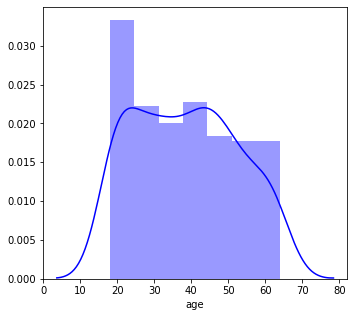

In [41]:
f= pl.figure(figsize=(12,5))
ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]['age'],color='b',ax=ax)

Well, another prove that it's more common for young people to smoke. 

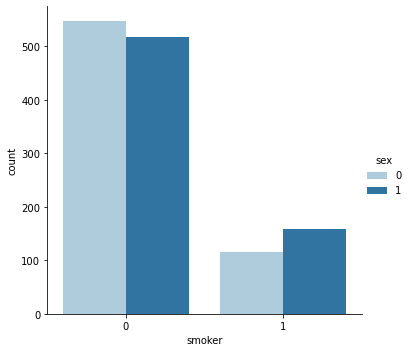

In [76]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Paired", data=df)

As said before, It is more common for women to smoke more than men.

[Text(0.5, 1.0, 'Insurance cost comparation between smoking or not')]

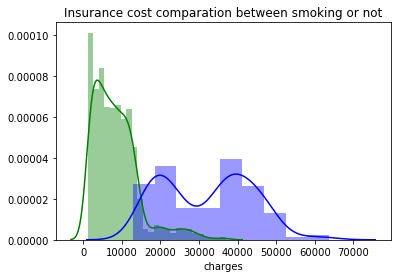

In [78]:
sns.distplot(df[(df.smoker == 0)]["charges"],color='g').set(title = 'Insurance cost comparation between smoking or not')
sns.distplot(df[(df.smoker == 1)]["charges"],color='b').set(title = 'Insurance cost comparation between smoking or not')

As we see it before, the insurance cost of the smokers is much bigger.

At the moment we have see the most relevant data, now were going to take all together.

In [93]:
df_gptest = df[['sex','smoker','charges','age']]
grouped_test1 = df_gptest.groupby(['sex','smoker'],as_index=False).mean()
grouped_test1

,sex,smoker,charges,age
0,0,0,8762.297300,39.691042
1,0,1,30678.996276,38.608696
2,1,0,8087.204731,39.061896
3,1,1,33042.005975,38.446541


Text(0.5, 1.0, 'Smokers and non-smokers')

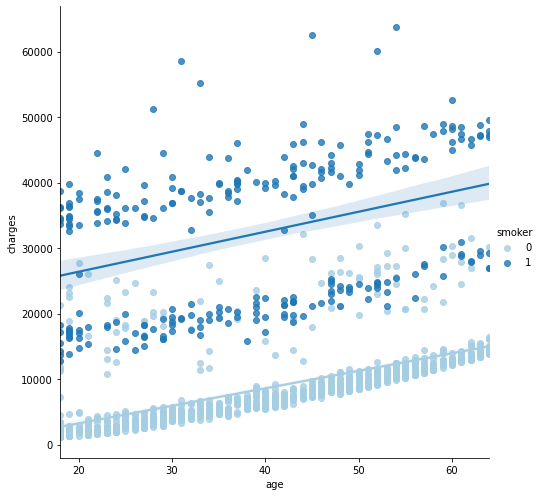

In [96]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'Paired', height = 7)
ax.set_title('Smokers and non-smokers')

Now we clarely see the importance of the age, hopessly, the older you get, the charge will be bigger.

### After analyzing the data we have come to some simple conclusions, now it's time to develop a proper prediction algorithm.

## 4. Model Development

In this particular dataset, we want to predict a continous value, so we're in front of a **Linear Regression** problem.

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

(0.0, 66902.8557155)

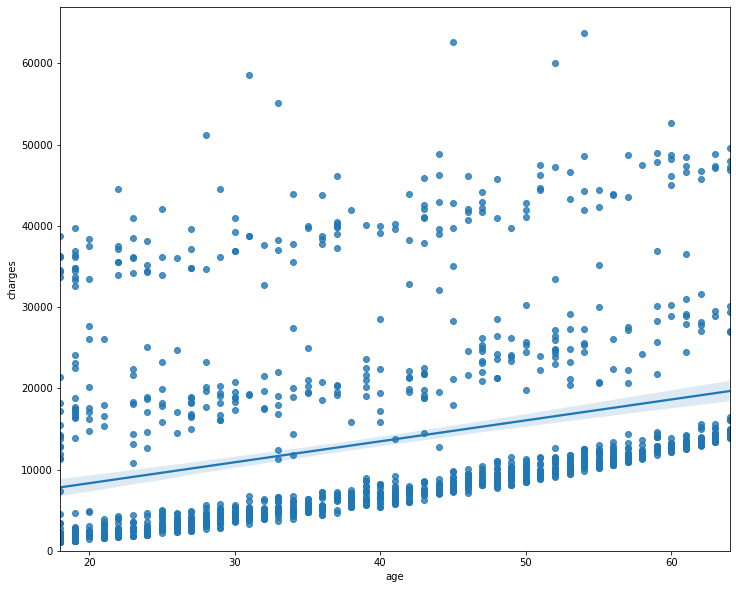

In [98]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="age", y="charges", data=df)
plt.ylim(0,)

As wee see, there's a positive relationship between the age and charges.

<p>From the previous section  we know that other good predictors of charges could be:</p>
<ul>
    <li>Smoker</li>
    <li>Age</li>
    <li>Sex</li>
    <li>BMI</li>
</ul>
Let's develop a model using these variables as the predictor variables.



First, were going to create a Linear Regression object, using SciPy libraries, split the dataset and fit it.

### 4.1 First try using normal linear regression (No polynomial)

In [134]:
from sklearn.model_selection import train_test_split
y_data = df['charges']
x_data = df.drop('charges',axis=1) #All the data except the one we want to predict it.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])



number of test samples : 134
number of training samples: 1204


In [113]:
ln = LinearRegression()

In [117]:
ln.fit(x_train[['age', 'sex', 'bmi','children','smoker']], y_train)

LinearRegression()

In [121]:
yhat_train = ln.predict(x_train[['age', 'sex', 'bmi','children','smoker']])

In [123]:
yhat_test = ln.predict(x_test[['age', 'sex', 'bmi','children','smoker']])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting. I've take from the internet the distribution plot.

In [131]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Charge (in dollars)')
    plt.ylabel('Provided Features')

    plt.show()
    plt.close()

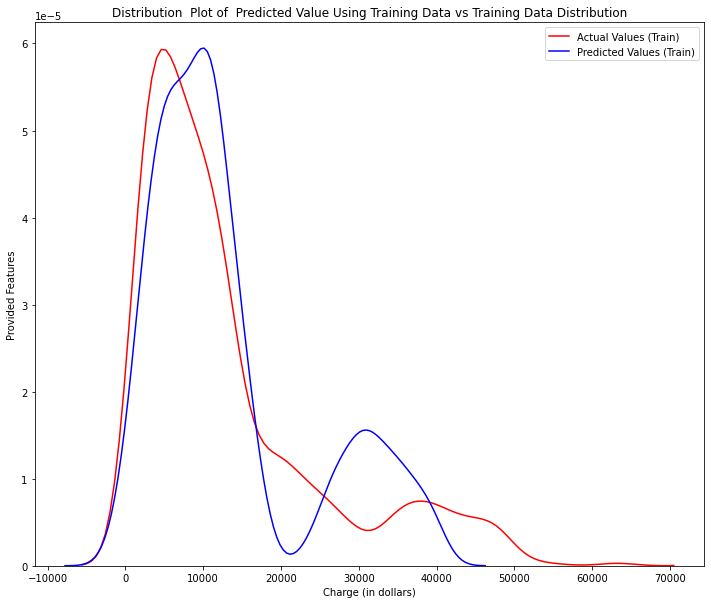

In [132]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)


As we see, the model works great for little charge values, but has some problem when fitting bigger amounts.

In [137]:
ln.score(x_train[['age', 'sex', 'bmi','children','smoker']], y_train)

0.7522560659488058

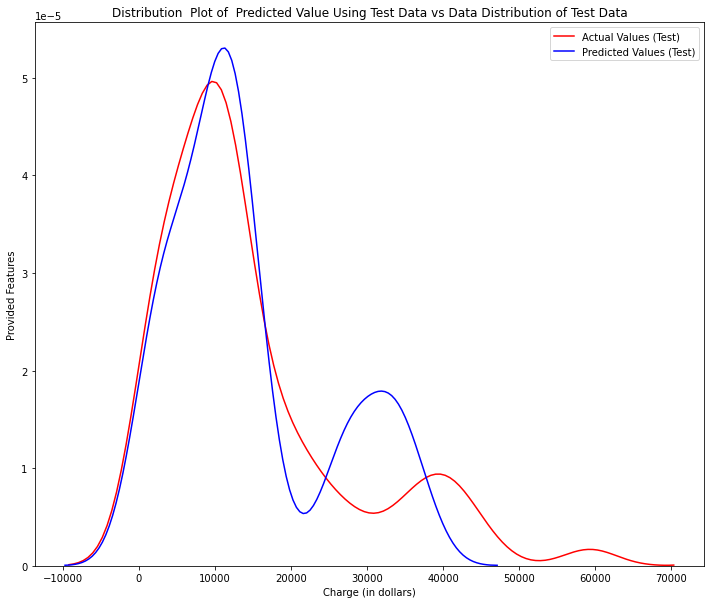

In [133]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [139]:
ln.score(x_test[['age', 'sex', 'bmi','children','smoker']], y_test) #Not the best score...

0.7243841993662776

On the test, same problem, little values okay, but does not work with large values.

### 4.2 Time to try using polynomial regression

In [141]:
from sklearn.preprocessing import PolynomialFeatures

Text(3, 0.75, 'Maximum R^2 ')

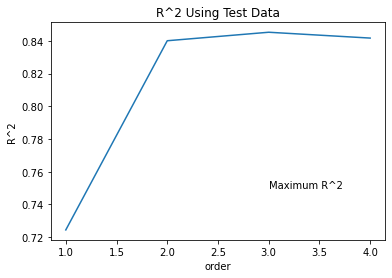

In [145]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['age', 'sex', 'bmi','children','smoker']])
    
    x_test_pr = pr.fit_transform(x_test[['age', 'sex', 'bmi','children','smoker']])    
    
    ln.fit(x_train_pr, y_train)
    
    Rsqu_test.append(ln.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

It's a little complicated to explain, but I'll try my best. Depending on the grade of the polynom, we can get higher R-score, which is the model "accuracy" score, so on, we try different grades, if we use a too high degree,  we will overfit, so i check the best R^2 score on the test set.

In [166]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['age', 'sex', 'bmi','children','smoker']])
x_test_pr = pr.fit_transform(x_test[['age', 'sex', 'bmi','children','smoker']])


In [170]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat_train = poly.predict(x_train_pr)
yhat_test = poly.predict(x_test_pr)

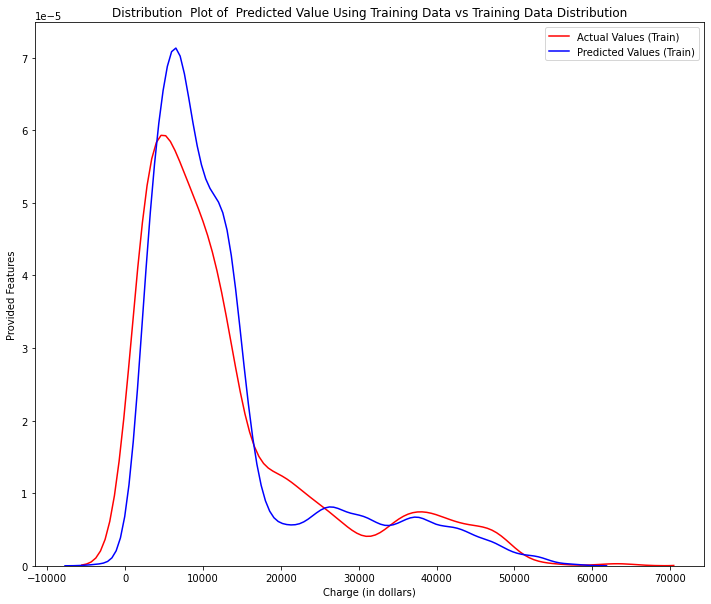

In [171]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [175]:
poly.score(x_train_pr, y_train)

0.8491402248904025

On the training set, the prediction doest not look good... but on the test set...

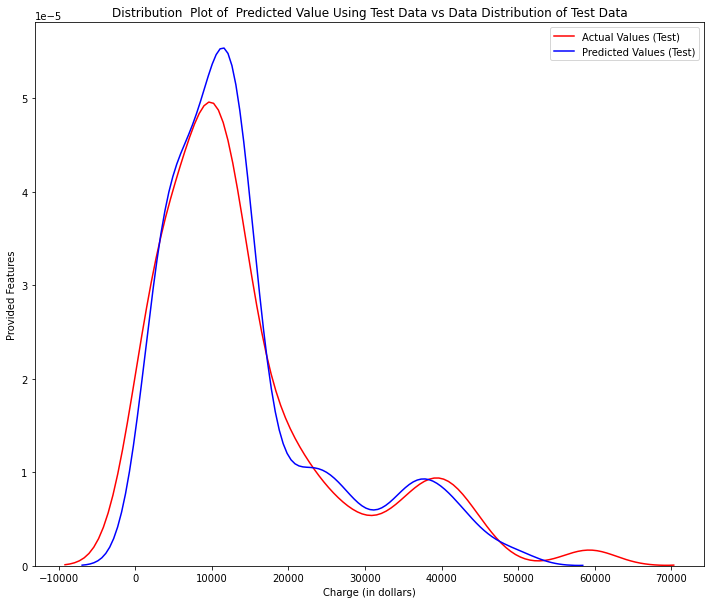

In [172]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

We have improved much our model!!!1

In [176]:
poly.score(x_test_pr, y_test)

0.8453388411240168

## So, that's all my friends! Hope you like my FIRST KAGGLE submission, in some time i will add more explanation about the code and the plotting.